In [1]:
# Install pandas if you don't have it yet
!pip install pandas 

In [ ]:
# pandas library, documentation

# https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# access this to read and understand the different functions in the pandas library

In [2]:
# Importing the library
import pandas as pd

In [4]:
# Load CSV or other files, and open it as a DataFrame
df = pd.read_csv("fct_invoice.csv") #specify delimiter if needed
# You might need a different function when loading xlsx or txt files...

df.head() #to show first 5 rows -- can input a number inside .head(n) to show first n numbers

#df.tail() to to show last 5 rows

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
jsondf = pd.read_json('2dim_customer.json')

jsondf.head(6)

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
5,NaN,Thomas,M,5,Alexander


# EASY 1

In [7]:
#easy 1

df['customer_id'].nunique()

5191

# EASY 2

In [8]:
#easy 2
print(df['category'].unique())
print(df['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


# EASY 3

In [9]:
#easy 3
print(df['payment_method'].mode())
print(df['payment_method'].value_counts())

0    Cash
Name: payment_method, dtype: object
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [10]:
df['Total Sales'] = df['quantity'] * df['price']

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Total Sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


# MEDIUM 1

In [11]:
#medium 1
df.groupby('category')['Total Sales'].sum().sort_values(ascending = False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Total Sales, dtype: float64

In [12]:
#medium 1
df.groupby('category').sum().sort_values('Total Sales',ascending = False).head(3)
#df.groupby("Rep").sum().sort_values("Total Price", ascending=False).head()

/var/folders/7z/qwknbm5147x07wck5lfbg1nh0000gn/T/ipykernel_45820/2143369349.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category').sum().sort_values('Total Sales',ascending = False).head(3)


,customer_id,quantity,price,Total Sales
category,,,,
Clothing,34578159,103558,31075684.64,1.139968e+08
Shoes,9901187,30217,18135336.89,6.655345e+07
Technology,5069499,15021,15772050.00,5.786235e+07


In [13]:
jsondf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [14]:
jsondf['age']

0       48.0
1        NaN
2       57.0
3       73.0
4       20.0
        ... 
5186     NaN
5187     NaN
5188    85.0
5189     NaN
5190     NaN
Name: age, Length: 5191, dtype: float64

In [15]:
over45 = jsondf[jsondf['age']>45]['id']

In [16]:
over45

0           0
2           2
3           3
6           6
10         10
        ...  
5181     8888
5182     8889
5184     9150
5185     9344
5188    10350
Name: id, Length: 1655, dtype: int64

In [33]:
sales_over45 = df[df['customer_id'].isin(over45)]
sales_over45['Total Sales'].sum()

82039768.15

# ANSWER TO MEDIUM 2

In [34]:
print('The total sales attributed to customers over the age of 45 is 82039768.15')

The total sales attributed to customers over the age of 45 is 82039768.15


In [18]:
#Medium 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'invoice_date' column to datetime if it's not already in that format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y')
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

sales_distribution = df.groupby(['year','month'])['Total Sales'].sum()
sales_distribution

year  month
2021  1         9641614.62
      2         8772315.22
      3         9455359.38
      4         9389541.54
      5         9771756.97
      6         9286271.35
      7        10311119.68
      8         9630655.70
      9         9188165.62
      10       10263015.06
      11        9265555.29
      12        9585200.16
2022  1         9764311.14
      2         8344111.92
      3         9986685.16
      4         9326144.44
      5         9947574.13
      6         9647503.95
      7        10067602.95
      8         9651705.59
      9         9607629.29
      10       10282075.37
      11        8941584.66
      12        9869885.48
2023  1         9485599.83
      2         9508662.96
      3         2514146.79
Name: Total Sales, dtype: float64

# MEDIUM 3 (GRAPH)

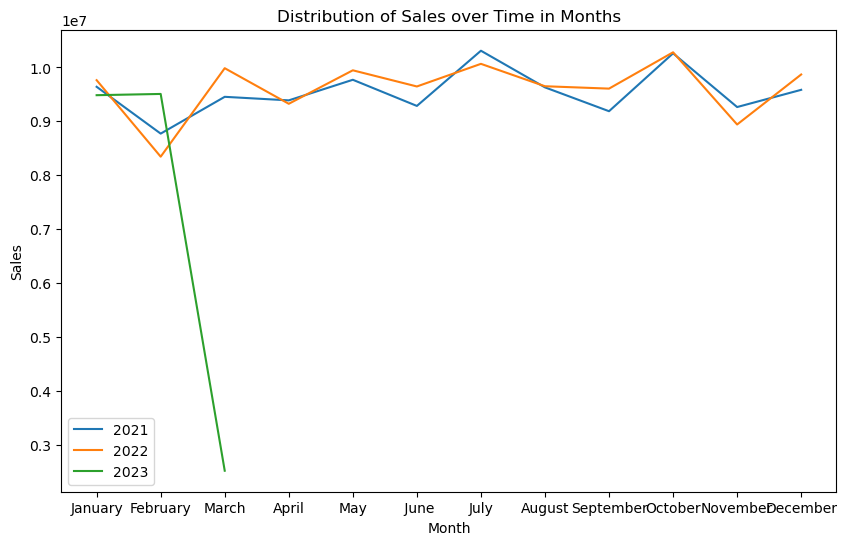

In [19]:
sales_distribution = sales_distribution.unstack(level=0)
sales_distribution.plot(kind="line", figsize=(10,6))
month_names = ['January', 'February', 'March', 'April', 'May',' June', 'July','August','September','October','November','December']
plt.title("Distribution of Sales over Time in Months")
plt.xlabel("Month")
plt.xticks(range(1,13), month_names)
plt.ylabel("Sales")
plt.legend(["2021", "2022", "2023"])
plt.show()

# MEDIUM 3 (SEASONAL ANALYSIS)

In [20]:
'''
SEASONAL ANALYSIS OF MEDIUM #3
- Sales increase/surge in the months of March, May, July, October, and December
- Sales decrease in the months of February, April, August, and November
- Sales greatlt decrease on February and November
- July has the highest sales, followed by October
- The graph lacks data for sales trends in 2023
'''

'\nSEASONAL ANALYSIS OF MEDIUM #3\n- Sales increase/surge in the months of March, May, July, October, and December\n- Sales decrease in the months of February, April, August, and November\n- Sales greatlt decrease on February and November\n- July has the highest sales, followed by October\n- The graph lacks data for sales trends in 2023\n'

In [21]:
pivotjson = jsondf.copy()
newpivotjson = pivotjson.rename(columns = {'id':'customer_id'})
newpivotjson

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# HARD 1 (PIVOT TABLE)

In [24]:
#HARD
pivotdf = pd.merge(df, newpivotjson, on='customer_id')
pivotdf["age_range"] = pd.cut(pivotdf["age"], bins=range(10, 91, 10), right=False)
pivot_table = pd.pivot_table(pivotdf, values="Total Sales", index="age_range", columns="category", aggfunc="sum")
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
"[10, 20)",12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
"[20, 30)",79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
"[30, 40)",84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
"[40, 50)",87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
"[50, 60)",74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
"[60, 70)",80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
"[70, 80)",54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
"[80, 90)",26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
